In [121]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [122]:
Nt = 1000
Nx = 50


x = np.linspace(0,1,Nx)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]

deltat = t[1] - t[0]

a=0.2
b=0.3
epsilon=0.03
D=0.01


In [123]:
Lambda_=D*deltat/ deltax**2

In [124]:
Lambda_##Lamba menor a 0.5

0.2403403403403404

In [125]:
def Init_u():
    
    u= np.zeros([Nt,Nx]) 
    
    for i in range(0,len(x)):
        
        u[0,i]=np.random.uniform(0,0.3)
        
    return u
        

In [126]:
u=Init_u()
u[:,0]=0.1
u[:,-1]=0.2
w=np.zeros([Nt,Nx])

def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            
            u[l,i] = u[l-1,i] + Lambda_*(u[l-1,i+1] -2*u[l-1,i]+u[l-1,i-1])\
            + deltat*(-u[l-1,i]*(u[l-1,i]-a)*(1-u[l-1,i])+w[l-1,i])
            
            
            w[l,i]= w[l-1,i] + deltat*epsilon*(u[l-1,i]-b*w[l-1,i])
            
            

In [127]:
u=Init_u()
u[:,0]=0.1
u[:,-1]=0.2
w=np.zeros([Nt,Nx])

GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 4942.37it/s]


<IPython.core.display.Javascript object>


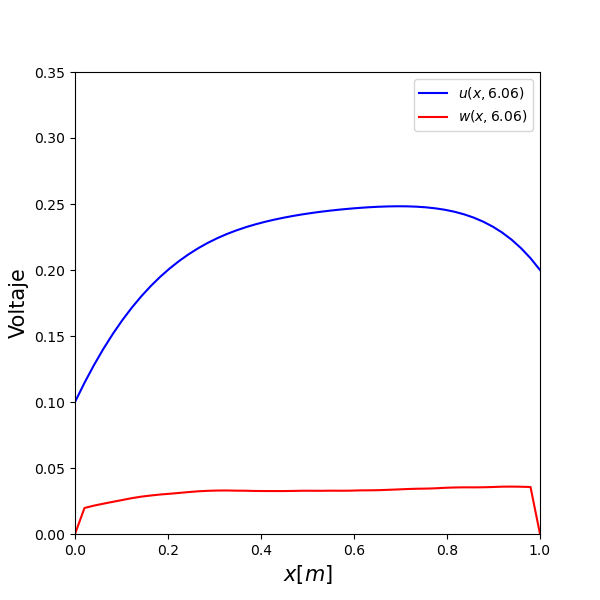

In [134]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
scale=5

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.35)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'Voltaje', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[::scale][i,:] ,color='b', label=r'$u(x,%.2f)$' %(t[::scale][i]))
    plot = ax.plot(x,w[::scale][i,:] ,color='r', label=r'$w(x,%.2f)$' %(t[::scale][i]))
    
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t[::scale]), init_func=init)

In [129]:

activada=[]

for l in tqdm(range(0,len(t))):
    for i in range(0,len(x)):
        
        if u[l,i]> 0.3:
            
            activada.append([l,i])
          
            break



100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 49913.77it/s]


In [130]:
activada=activada[0]

t_activacion=t[activada[0]]
x_activacion=x[activada[1]]

In [131]:
print(t_activacion,x_activacion)

8.358358358358359 0.6122448979591836


In [132]:
u[activada[0],activada[1]]

0.3001057520596533

<IPython.core.display.Javascript object>


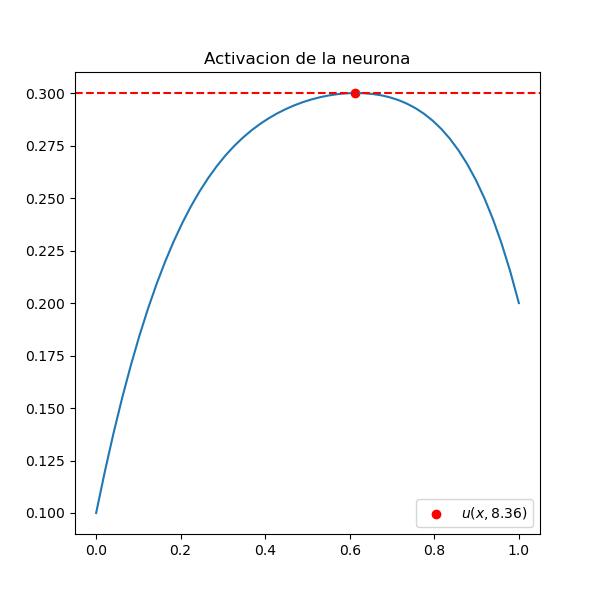

In [133]:
fig2=plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(x,u[activada[0],:])
ax2.axhline(y=0.3,ls="--",c="r")
ax2.scatter(x_activacion,u[activada[0],activada[1]],c="r",label=r'$u(x,%.2f)$'% (t_activacion))
ax2.set_title("Activacion de la neurona")
plt.legend()
